In [ ]:
# script que implementa FinaleToolkit para análisis fragmentómico
# https://github.com/epifluidlab/FinaleToolkit
# autora: suarezhs@uoc.edu

El pipeline se ha instalado previamente en conda. El environment está disponible en el repositorio (environment.yaml).

In [ ]:
#!conda install -c bioconda -c conda-forge finaletoolkit

# Importar datos

In [3]:
# settings generales

# working directory to root folder
import os
#os.chdir('/mnt/scratch_dir/suarezhs/tfm/bcltofragmentomics/')
os.chdir('/Users/sarasuarez/Desktop/bcltofragmentomics')

# output directories
# datos procesddos (QC) - en root (donde data folder)
data_qcdir = '../data/alignments_qc'

# resultados
results_frag = 'results/01_fragment_lengths'
results_endmot = 'results/02_endmotifs'

# crearlos
os.makedirs(data_qcdir, exist_ok=True)
os.makedirs(results_frag, exist_ok=True)
os.makedirs(results_endmot, exist_ok=True)

In [4]:
os.getcwd()

'/Users/sarasuarez/Desktop/bcltofragmentomics'

In [ ]:
# en terminal
#finaletoolkit frag-length-bins \
#   ../data/alignments/POOL-473N/L-25000010_S5.bam \
#   -min 50 \
#   -max 300 \
#   --bin-size 1 \
#   -q 30 \
#   > L-25000010_S5_fraglengths.tsv

In [36]:
# que hay en el paquete porque no encuento documentacion que no sea
# para el command line

import finaletoolkit as ftk
import pkgutil
import importlib

for m in pkgutil.iter_modules(ftk.__path__):
    print(m.name)

submodules = ["cli", "frag", "genome", "utils", "version"]

for sm in submodules:
    print("\n### Submodule:", sm)
    mod = importlib.import_module(f"finaletoolkit.{sm}")
    print(dir(mod))

cli
frag
genome
utils
version

### Submodule: cli
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']

### Submodule: frag
['BreakpointMotifFreqs', 'BreakpointMotifsIntervals', 'EndMotifFreqs', 'EndMotifsIntervals', 'FPROFILE_PATH', 'Iterable', 'Iterator', 'MIN_QUALITY', 'NDArray', 'Path', 'Pool', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_adjust_wps', '_breakpoint_motifs', '_cleavage_profile', '_coverage', '_delfi', '_delfi_gc_correct', '_delfi_merge_bins', '_end_motifs', '_frag_length', '_multi_wps', '_wps', 'adjust_wps', 'annotations', 'breakpoint_motifs', 'cleavage_profile', 'coverage', 'delfi', 'delfi_gc_correct', 'delfi_merge_bins', 'end_motifs', 'files', 'frag_generator', 'frag_length', 'frag_length_bins', 'frag_length_intervals', 'gzip', 'interval_breakpoint_motifs', 'interval_end_motifs', 'multi_wps', 'np', 'pkg_data', 'py2bit', 'regio

In [43]:
import finaletoolkit.frag as frag

#help(frag.frag_length_bins)

help(frag.end_motifs)

Help on function end_motifs in module finaletoolkit.frag._end_motifs:

end_motifs(input_file: 'str', refseq_file: 'str | Path', k: 'int' = 4, min_length: 'int | None' = 50, max_length: 'int | None' = None, both_strands: 'bool' = True, negative_strand: 'bool' = False, output_file: 'None | str' = None, quality_threshold: 'int' = 30, workers: 'int' = 1, verbose: 'bool | int' = False, fraction_low: 'int | None' = None, fraction_high: 'int | None' = None) -> 'EndMotifFreqs'
    Function that reads fragments from a BAM, CRAM, or tabix indexed
    file and returns the 5' k-mer (default is 4-mer) end motif
    frequencies as a dictionary. Optionally writes data to a tsv. This
    function reproduces the methodology of Zhou et al (2023).

    Parameters
    ----------
    input_file : str
        BAM, CRAM, or Frag.gz file with paired-end reads.
    refseq_file : str or Path
        2bit file with sequence of reference genome input_file is
        aligned to.
    k : int, optional
        Lengt

# QC

* Crea carpeta en data/alignments_qc
* Runneado aquí pero mover como script
* **QUITAR CONTEO INCLUIDO/EXCLUIDO PARA BARPLOT**

In [ ]:
# # head of bam file
# import os
# import glob
# import pysam # leer bam en python
# import matplotlib.pyplot as plt
# import numpy as np
# import time

# # este codigo aplica QC y genera barplot de lecturas incluidas/excluidas

# start = time.time()

# # path archivos bam
# data_bamsdir = glob.glob("../data/alignments/POOL-*/*.markdup.bam")

# # bams a analizar (no vacios) - esto es temporar ya que deberian de haberse ignorado en el alineamiento
# bams_lecturas = []

# for filepath in data_bamsdir:
#     # guardo nombre sample (base del path) sin markdup.bam
#     samplename = os.path.basename(filepath).replace('.markdup.bam', '')
    
#     # si no es muestra a excluir (vacia)
#     if not re.match(r"^ID([1-9]|1[0-9]|2[0-4])_", samplename):
#         # anyado a bam con lecturas
#         bams_lecturas.append(filepath)

# total_files = len(bams_lecturas)

# #sample_list = []
# included_counts = []
# excluded_counts = []

# for i, filepath in enumerate(bams_lecturas, start=1):

#     # guardo nombre sample (base del path) sin markdup.bam
#     samplename = os.path.basename(filepath).replace('.markdup.bam', '')

#     # anyado a lista
#     #sample_list.append(sample)

#     # conteo de pares de lecturas includias/exclusiodas
#     included = 0
#     excluded = 0

#     # crear output qc file a escribir
#     out_bam_path = os.path.join(data_qcdir, samplename + ".filtered.bam")

#     # y escribir cada lectura (los pares que han pasado el filtro)
#     print(f'Leyendo y filtrando archivo .markdup.bam #{i}/{total_files} y escribiendo en: {out_bam_path}\n')
        
#     # leer bam u escribir filtered.bam correspondiente
#     with pysam.AlignmentFile(filepath, "rb") as bam, pysam.AlignmentFile(out_bam_path, "wb", header=bam.header) as out_bam:

#         # para cada lectura hasta el final (until_eof=T)
#         for read in bam.fetch(until_eof=True):

#             # excluir si se cumple cualquiera de estas reglas
#             if (
#                 read.is_unmapped or # lectura no mapeada
#                 read.mate_is_unmapped or # par de lecturas no alineada ok
#                 read.is_duplicate or # lectura esta duplicada
#                 not read.is_proper_pair or # lectura no esta emparejada
#                 read.mapping_quality <= 30 # la calidad del alineamiento es baja
#             ):
#                 # si es read1 - anyadir a lista excluir (solo contar el par como 1)
#                 if read.is_read1:
#                     excluded += 1
#                 # si no seguir
#                 continue
            
#             out_bam.write(read)

#             # si es read1 y ha pasado el filtro, anyadimos la lectura (representante
#             # del par) a lista incluidas
#             if read.is_read1:
#                 included += 1

#     # anyadimos las lecturas a la lista respectiva
#     included_counts.append(included)
#     excluded_counts.append(excluded)
    
#     # crear bai (necesario para FinaleToolkit
#     pysam.index(out_bam_path)    


# end = time.time()

# # imprimo tiempo de computacion
# print(f"Tiempo total: {end - start/60:.2f} minutos")

In [ ]:
results_filesdir

# FinaleToolKit

## Longitud de fragmentos (una carpeta por ahora)

* Generar tsv a partir de .markdup.bam (antes de QC) y filtered.bam (despues de QC) para histogramas
* En HPC por velocidad: script *01_fragment_lengths.py*

In [ ]:
# script 01_fragment_lengths.py
# bsub -o out_fraglength.txt -e err_fraglength.txt -q bio -n 2 -W 2800 -M 64000 -hl -R 'rusage[mem=64000]' python scripts/01_fragment_lengths.py

**TSV-frag_length_bins():**

In [5]:
results_frag

'results/01_fragment_lengths'

In [6]:
import pandas as pd
pd.read_csv(os.path.join(results_frag, "L-25000010_S5.markdup.tsv"), 
                         index_col=None, 
                         sep='\t').head()

,min,max,count
0,78,78,2426
1,79,79,3117
2,80,80,3601
3,81,81,6597
4,82,82,5500


**HISTOGRAMA-frag_length_bins():** ejemplo histogramas pre-QC

In [ ]:
# from finaletoolkit.frag import frag_length_bins 
# for filename in glob.glob("../data/alignments/POOL-527N/*.markdup.bam"):
#     #print(os.path.basename(filename)) # basename extrae filename del filename
#     # guardo samplename quitando la extension
#     samplename = os.path.basename(filename).replace(".markdup.bam", "")
#     print(samplename)
#     frag_length_bins(input_file=filename,
#                      bin_size=1,
#                      min_length=50, 
#                      max_length=300,
#                      quality_threshold=30,
#                      output_file=os.path.join(results_filesdir, samplename + ".tsv"),
#                      histogram_path=os.path.join(results_plotdir, samplename + ".png")
#                     )

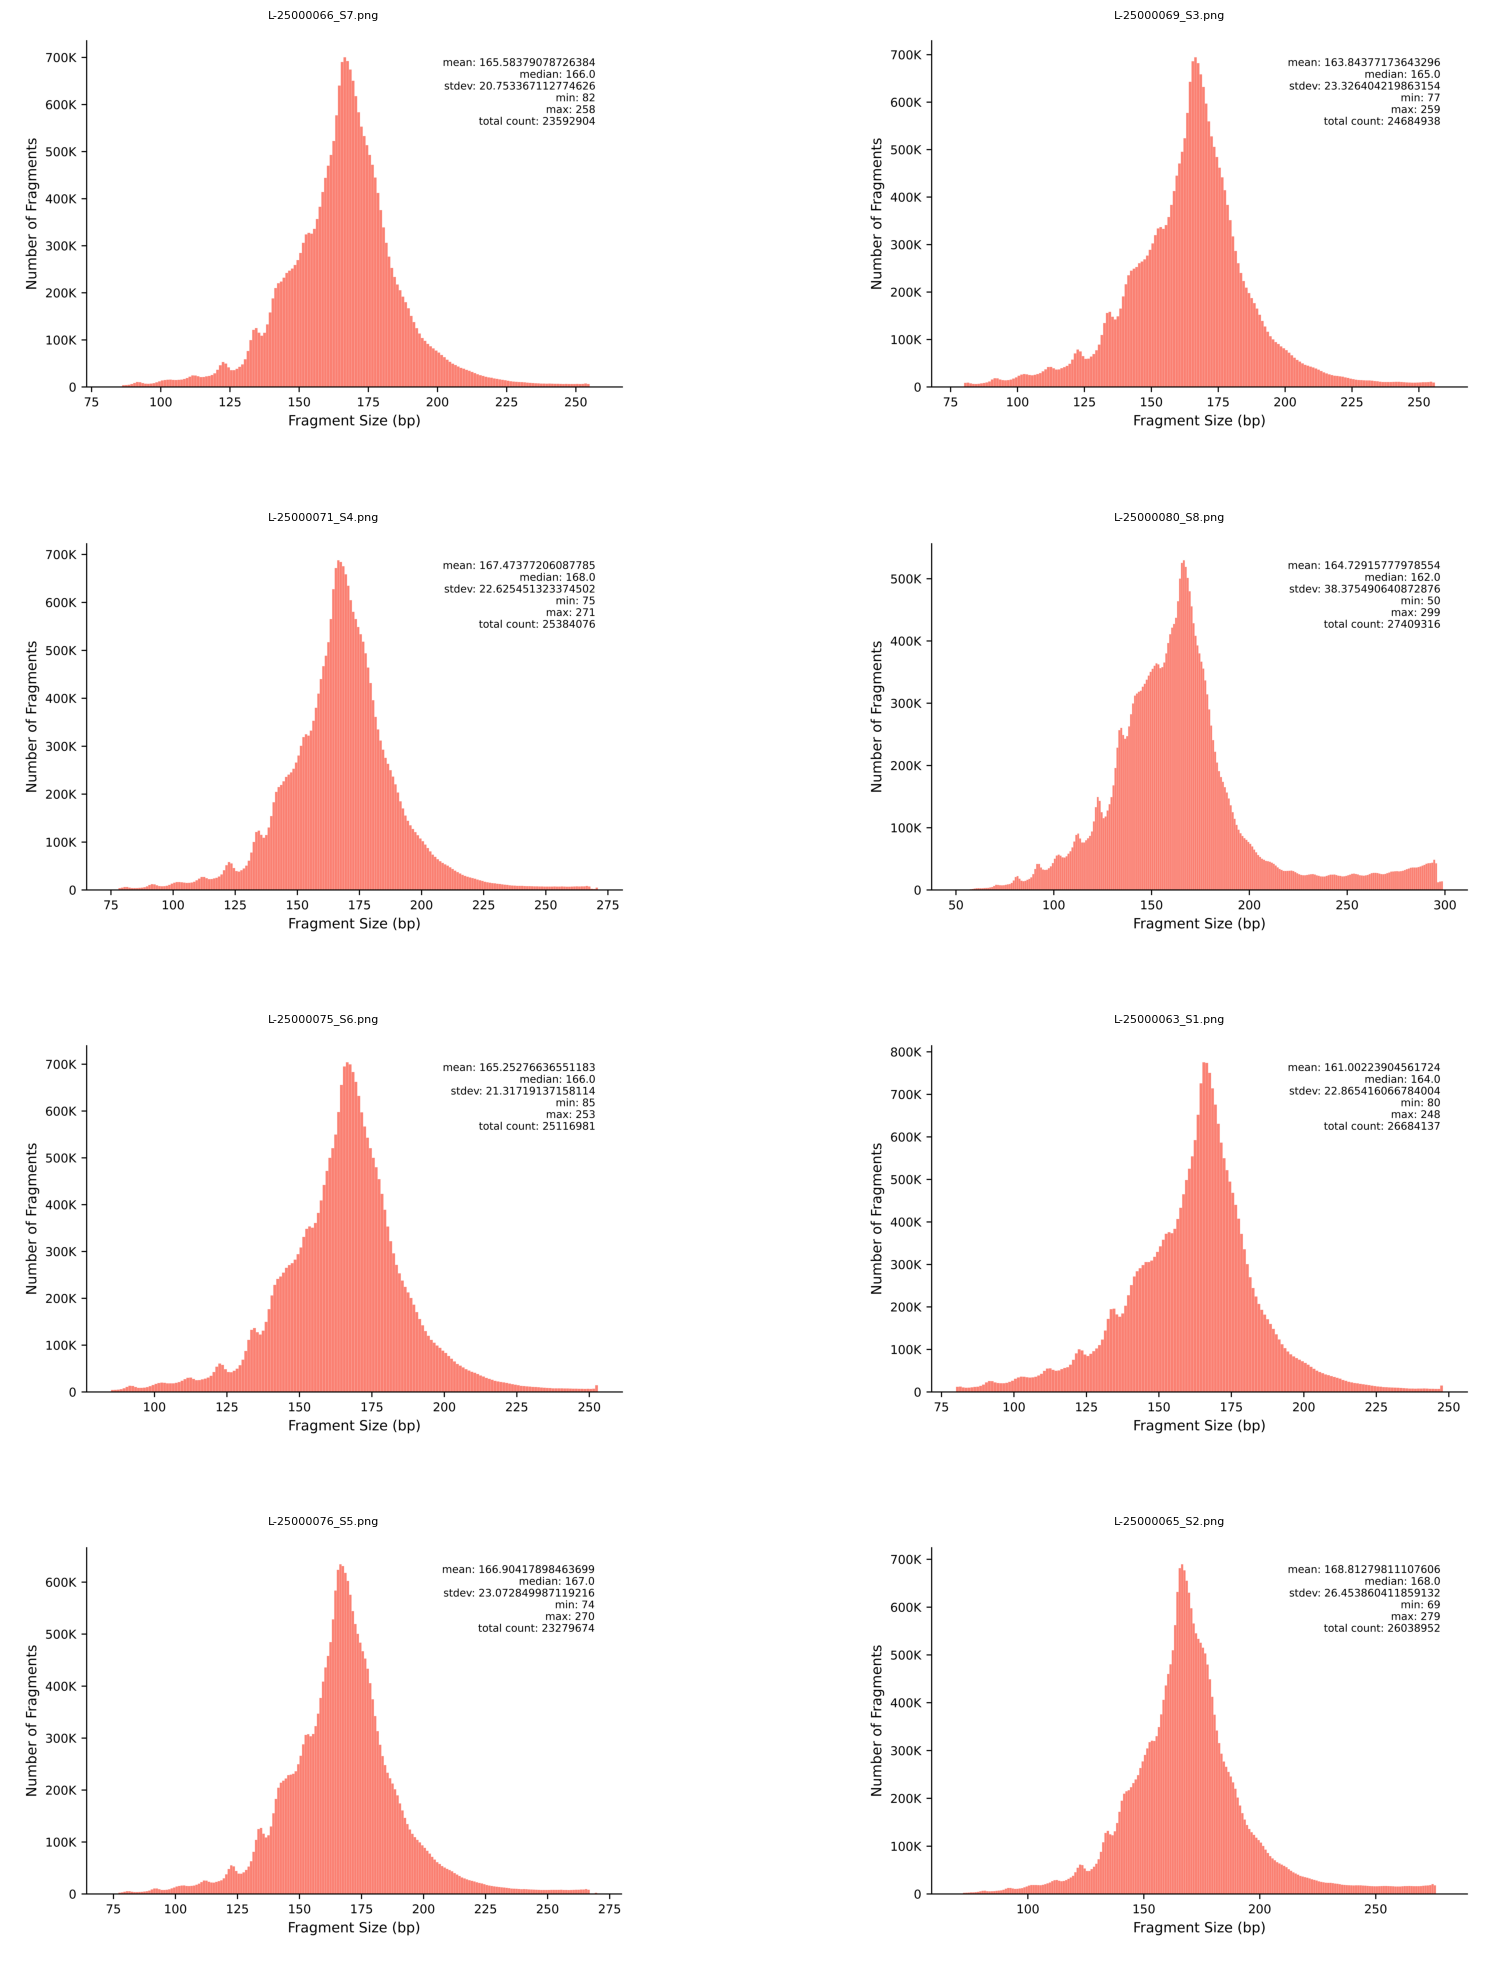

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pngfiles = glob.glob('results/plots/*.png')

# defino panel 
fig, axes = plt.subplots(4, 2, figsize=(20, 25))

# Flatten axes array for easy iteration
axes = axes.flatten()

# iteramos en axis e imagenes
for ax, img_path in zip(axes, pngfiles):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis("off")  # no ticks or frames

    # saco el nombre
    fname = os.path.basename(img_path)

    # cogo lo de antes de .bam
    title = fname.split(".bam")[0]

    # Set the subplot title
    ax.set_title(title, fontsize=8)

**HISTOGRAMA-frag_length_bins():** ejemplo histogramas pre-QC

**NOTA: AUN NO ESTAN LOS MISMOS ARCHIVOS FILTRADOS**

In [10]:
import os
import glob
import pysam # leer bam en python
import matplotlib.pyplot as plt
import numpy as np
import time

list_pool527 = []
for filename in glob.glob("../data/alignments/POOL-527N/*.markdup.bam"):
     #print(os.path.basename(filename)) # basename extrae filename del filename
     # guardo samplename quitando la extension
     samplename = os.path.basename(filename).replace(".markdup.bam", "")
     #print(samplename)
     list_pool527.append(samplename)

print(list_pool527)

[]


In [17]:
list_pool527 = ['L-25000063_S1', 'L-25000080_S8', 'L-25000065_S2', 'L-25000071_S4', 'L-25000075_S6', 'L-25000076_S5', 'L-25000069_S3', 'L-25000066_S7']
list_pool527

['L-25000063_S1',
 'L-25000080_S8',
 'L-25000065_S2',
 'L-25000071_S4',
 'L-25000075_S6',
 'L-25000076_S5',
 'L-25000069_S3',
 'L-25000066_S7']

['results/01_fragment_lengths/L-25000065_S2.filtered.png', 'results/01_fragment_lengths/L-25000066_S7.filtered.png', 'results/01_fragment_lengths/L-25000075_S6.filtered.png', 'results/01_fragment_lengths/L-25000069_S3.filtered.png', 'results/01_fragment_lengths/L-25000063_S1.filtered.png', 'results/01_fragment_lengths/L-25000080_S8.filtered.png', 'results/01_fragment_lengths/L-25000076_S5.filtered.png', 'results/01_fragment_lengths/L-25000071_S4.filtered.png']


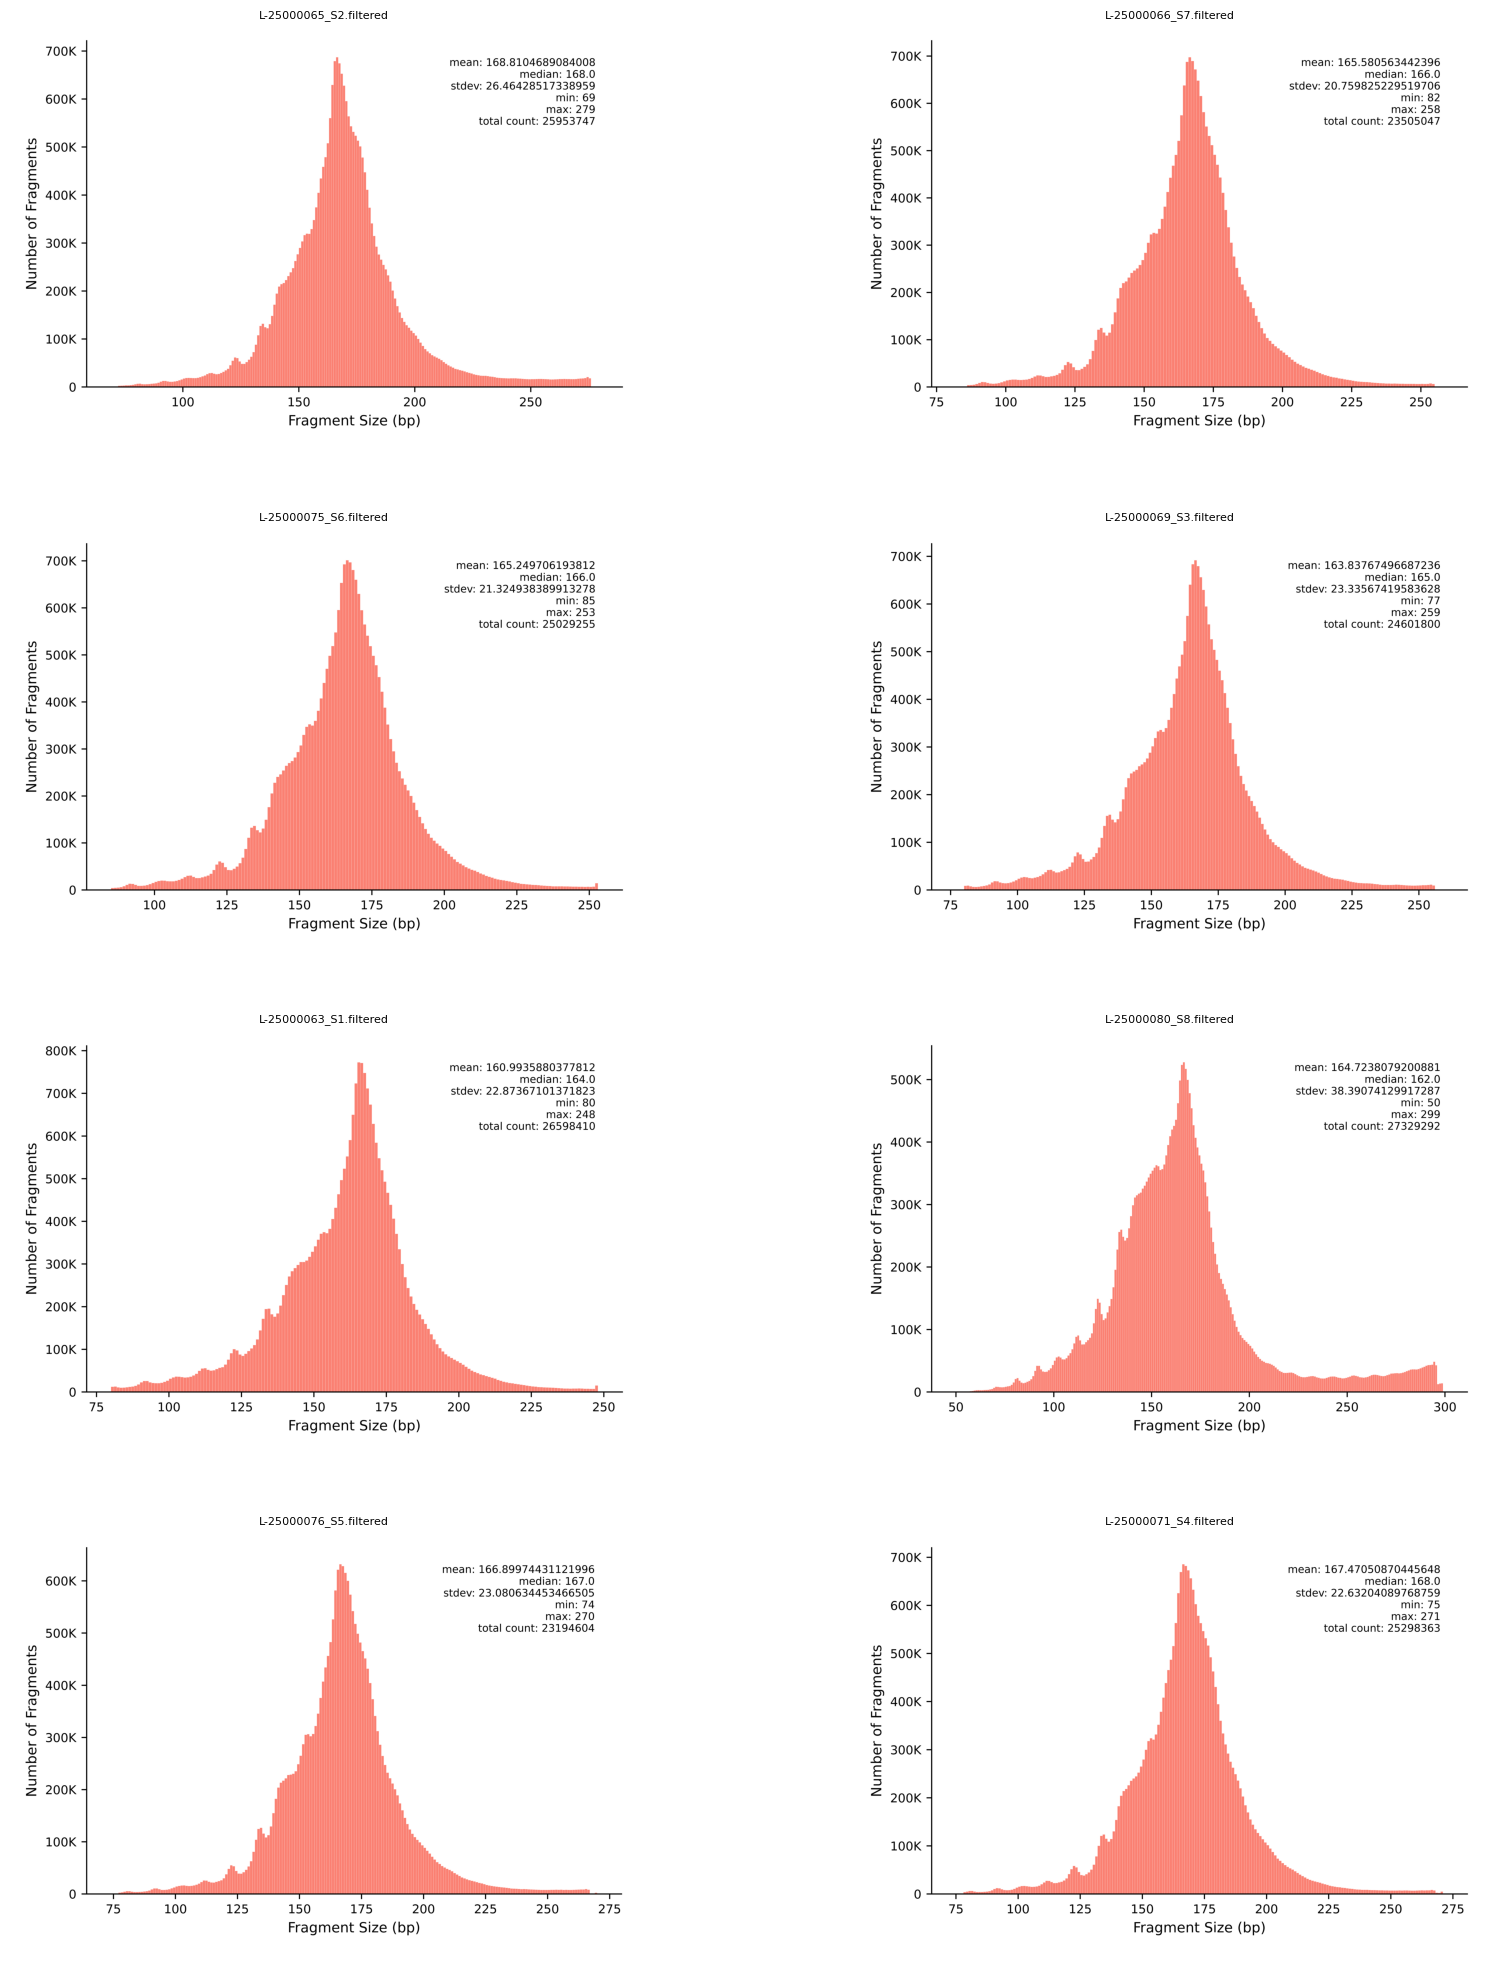

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# defino panel 
fig, axes = plt.subplots(4, 2, figsize=(20, 25))

# flatten ejes
axes = axes.flatten()

# lista a rellenar con archivos de pool-527
pngfiles = []

for filename in glob.glob("results/01_fragment_lengths/*.filtered.png"):
    
    samplename = os.path.basename(filename).replace(".filtered.png", "")
    #print(samplename)
    #print(os.path.basename(filename))
    
    if samplename in list_pool527:
        #print(samplename)

        # anyadir filename entero a lista
        pngfiles.append(filename)

print(pngfiles)

# iteramos en axis e imagenes
for ax, img_path in zip(axes, pngfiles):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis("off")  # no ticks or frames

    # saco el nombre
    fname = os.path.basename(img_path)

    # cogo lo de antes de .png para identificar filtrado
    title = fname.split(".png")[0]

    # titulo
    ax.set_title(title, fontsize=8)

* Vemos que hay distinta amplificación de fragmentos de diferentes tamaños (la mayoría de lecturas en fragmentos con tamaño medio/modal). Por esto, los duplicados tampoco estan uniformemente distribuidos a lo largo de los fragmentos y necesitaremos calcular la frequencia relativa para poder comparar la distribución de fragmentos antes y después del QC.

## Comandos Git ignorar reference file

In [ ]:
#git rm --cached hg38.2bit
#git remote add origin git@github.com:sara-suarez93/bcltofragmentomics.git
#git push --force
#git push --set-upstream origin main
#git push --force

## Motivos de corte

In [ ]:
# script 01_fragment_lengths.py
# bsub -o logs_hpc/out_endmot.txt -e logs_hpc/err_endmot.txt -q bio -n 1 -W 2800 -M 64000 -hl -R 'rusage[mem=64000]' python scripts/02_endmotifs.py

# QC

## Histogramas conteos

In [27]:
# uno .tsv pre- y post-qc
df_fraglen = []

for f in glob.glob("results/01_fragment_lengths/*.tsv"):
    df = pd.read_csv(f, sep="\t")

    sample = os.path.basename(f).split(".")[0]
    #print(sample)
    qc = "post" if "filtered" in f else "pre"

    df["sample"] = sample
    df["qc"] = qc

    df_fraglen.append(df)

df_fraglen = pd.concat(df_fraglen, ignore_index=True)

df_fraglen.head()

,min,max,count,sample,qc
0,65,65,4,L-25000049_S4,post
1,66,66,870,L-25000049_S4,post
2,67,67,987,L-25000049_S4,post
3,68,68,1173,L-25000049_S4,post
4,69,69,10416,L-25000049_S4,post


In [66]:
# frecuencia relativa - numero de fragmentos de x tamanyo/numero total por muestra
df_fraglen["rel_freq"] = (
    df_fraglen["count"] /
    # suma numero total para cada muestra
    df_fraglen.groupby(["sample", "qc"])["count"].transform("sum")
)


df_fraglen["scaled_freq"] = (
    # min-media/std
     (df_fraglen["rel_freq"]- df_fraglen.groupby("min")["rel_freq"].transform("mean")) / 
    df_fraglen.groupby("min")["rel_freq"].transform("std")
)


df_fraglen.head()

,min,max,count,sample,qc,rel_freq,scaled_freq
0,65,65,4,L-25000049_S4,post,1.515868e-07,-0.854557
1,66,66,870,L-25000049_S4,post,3.297013e-05,-0.677005
2,67,67,987,L-25000049_S4,post,3.740405e-05,-0.639620
3,68,68,1173,L-25000049_S4,post,4.445283e-05,-0.674418
4,69,69,10416,L-25000049_S4,post,3.947321e-04,0.690074


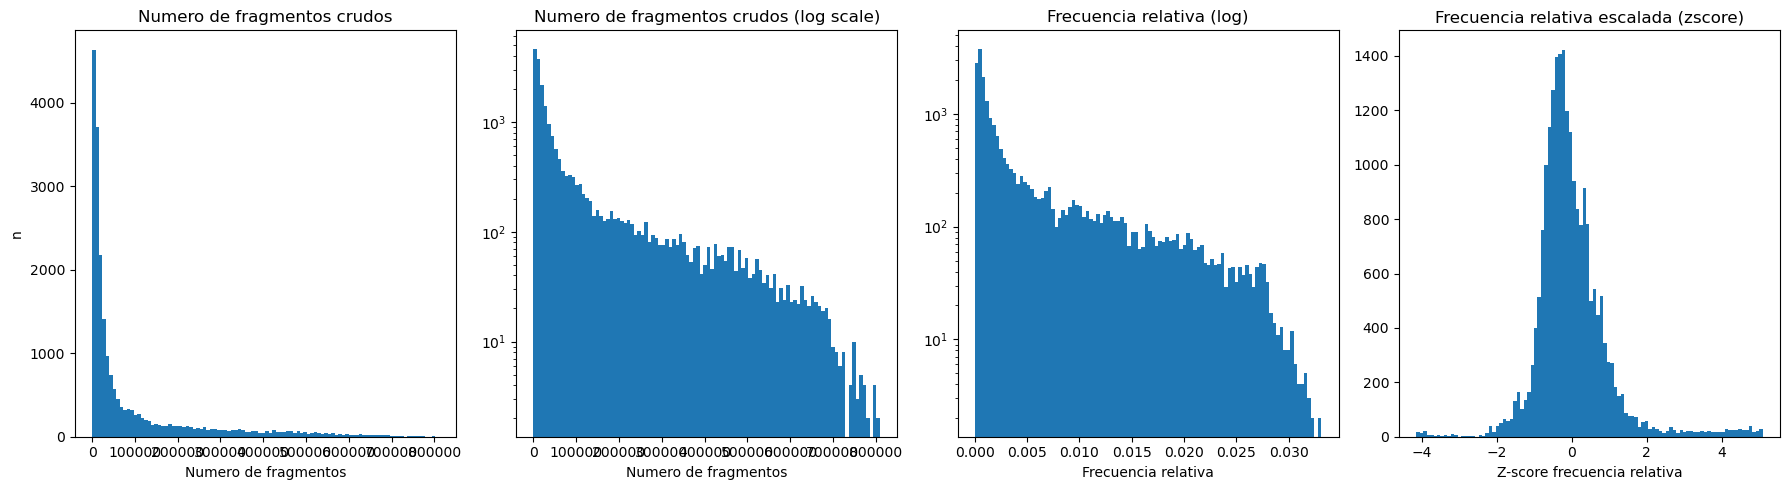

In [67]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=False)

axes[0].hist(
    df_fraglen["count"],
    bins=100
)

axes[0].set_title("Numero de fragmentos crudos")
axes[0].set_xlabel("Numero de fragmentos")
axes[0].set_ylabel("n")

axes[1].hist(
    df_fraglen["count"],
    bins=100,
    log=True
)

# log en frecuencias relativas
axes[1].set_title("Numero de fragmentos crudos (log scale)")
axes[1].set_xlabel("Numero de fragmentos")

axes[2].hist(
    df_fraglen["rel_freq"],
    bins=100,
    log=True
)

axes[2].set_title("Frecuencia relativa (log)")
axes[2].set_xlabel("Frecuencia relativa")

axes[3].hist(
    df_fraglen["scaled_freq"],
    bins=100
)

axes[3].set_xlabel("Z-score frecuencia relativa")
axes[3].set_title("Frecuencia relativa escalada (zscore)")

plt.tight_layout()
plt.show()

## PCA pre. vs post-QC

In [68]:
# PCA-rel freqs
mat_fraglen = (
    df_fraglen
    .pivot_table(
        index=["sample", "qc"],
        columns="min",        # fragment length
        values="rel_freq",
        fill_value=0)
)
pca = PCA(n_components=2)
pcs = pca.fit_transform(mat_fraglen)

df_pca = (
    pd.DataFrame(pcs, columns=["PC1", "PC2"], index=mat_fraglen.index)
    .reset_index()
)
df_pca.head()

,sample,qc,PC1,PC2
0,10-CH_S5,post,0.012766,-0.014611
1,10-CH_S5,pre,0.012760,-0.014635
2,12-CH_S6,post,0.012324,-0.012645
3,12-CH_S6,pre,0.012325,-0.012673
4,2-CH_S1,post,-0.021316,0.028088


In [69]:
mat_fraglen_scaled = (
    df_fraglen
    .pivot_table(
        index=["sample", "qc"],
        columns="min",        # fragment length
        values="scaled_freq",
        fill_value=0)
)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(mat_fraglen_scaled)

df_pca_scaled = (
    pd.DataFrame(pcs, columns=["PC1", "PC2"], index=mat_fraglen_scaled.index)
    .reset_index()
)
df_pca_scaled.head()

,sample,qc,PC1,PC2
0,10-CH_S5,post,-6.280172,9.720016
1,10-CH_S5,pre,-6.270670,9.729166
2,12-CH_S6,post,-6.444985,7.806219
3,12-CH_S6,pre,-6.440481,7.815257
4,2-CH_S1,post,0.774564,-18.680985


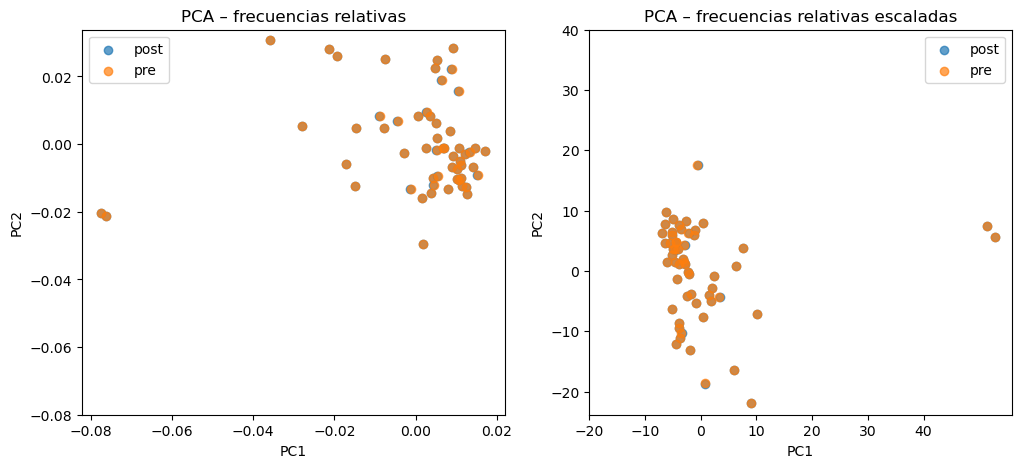

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# frecuencias relativas
for qc, g in df_pca.groupby("qc"):
    axes[0].scatter(g.PC1, g.PC2, label=qc, alpha=0.7)

axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].set_xticks(np.arange(-0.08, 0.03, 0.02))
axes[0].set_yticks(np.arange(-0.08, 0.03, 0.02))
axes[0].set_title("PCA – frecuencias relativas")
axes[0].legend()

# escalados
for qc, g in df_pca_scaled.groupby("qc"):
    axes[1].scatter(g.PC1, g.PC2, label=qc, alpha=0.7)

axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].set_xticks(np.arange(-20, 50, 10))
axes[1].set_yticks(np.arange(-20, 50, 10))
axes[1].set_title("PCA – frecuencias relativas escaladas")
axes[1].legend()

In [80]:
# outliers
df_pca_scaled.sort_values(by="PC1", ascending=False).head()

,sample,qc,PC1,PC2
14,CTRL-M-BL-CHUIMI_S7,post,52.859347,5.578969
15,CTRL-M-BL-CHUIMI_S7,pre,52.832767,5.606263
12,CTRL-F-BL-CHUIMI_S8,post,51.380720,7.445563
13,CTRL-F-BL-CHUIMI_S8,pre,51.360148,7.478077
90,L-25000080_S8,post,10.165339,-7.141910


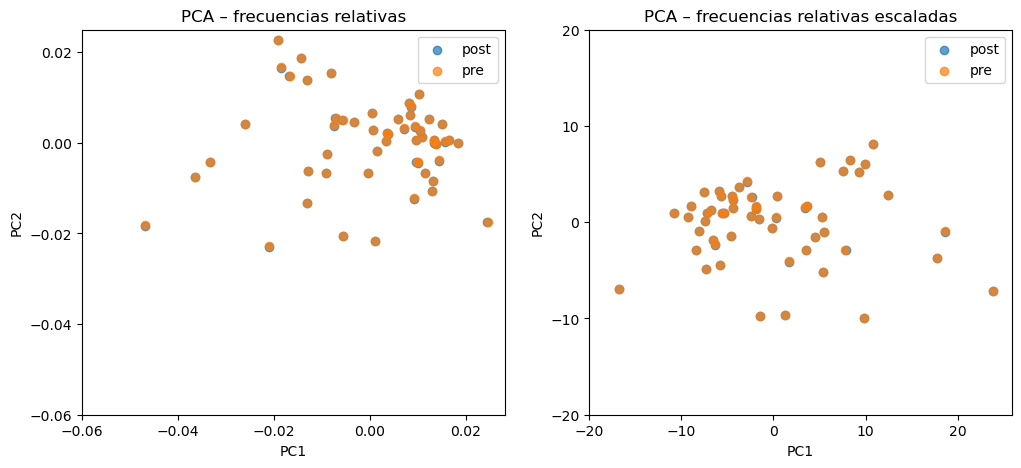

In [83]:
# excluding controls
ctrl_samples = ["CTRL-M-BL-CHUIMI_S7", "CTRL-F-BL-CHUIMI_S8"]

# exclude them
df_fraglen = df_fraglen[~df_fraglen["sample"].isin(ctrl_samples)]

# remake PCAs
mat_fraglen = (
    df_fraglen
    .pivot_table(
        index=["sample", "qc"],
        columns="min",        # fragment length
        values="rel_freq",
        fill_value=0)
)
pca = PCA(n_components=2)
pcs = pca.fit_transform(mat_fraglen)

df_pca = (
    pd.DataFrame(pcs, columns=["PC1", "PC2"], index=mat_fraglen.index)
    .reset_index()
)

# escalada
mat_fraglen_scaled = (
    df_fraglen
    .pivot_table(
        index=["sample", "qc"],
        columns="min",        # fragment length
        values="scaled_freq",
        fill_value=0)
)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(mat_fraglen_scaled)

df_pca_scaled = (
    pd.DataFrame(pcs, columns=["PC1", "PC2"], index=mat_fraglen_scaled.index)
    .reset_index()
)

# representar
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# frecuencias relativas
for qc, g in df_pca.groupby("qc"):
    axes[0].scatter(g.PC1, g.PC2, label=qc, alpha=0.7)

axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].set_xticks(np.arange(-0.06, 0.03, 0.02))
axes[0].set_yticks(np.arange(-0.06, 0.03, 0.02))
axes[0].set_title("PCA – frecuencias relativas")
axes[0].legend()

# escalados
for qc, g in df_pca_scaled.groupby("qc"):
    axes[1].scatter(g.PC1, g.PC2, label=qc, alpha=0.7)

axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].set_xticks(np.arange(-20, 30, 10))
axes[1].set_yticks(np.arange(-20, 30, 10))
axes[1].set_title("PCA – frecuencias relativas escaladas")
axes[1].legend()

# Análisis

## PCA colon vs NSCL

## NSCLC fragmentos

## NSCLC end-motifs

# TO-DO

## Procesado de datos:
- [x] Run POOL-527N
- [x] Running: POOL-473
- [x] Run las demas
- [ ] repetir snakemake usando tool Agilent para sacar fastq con UMI (3ra read) y marcar duplicados con picard UMI-aware thingy (ver mail Ivan)
- [x] script (o ver si hay funcion en Finaletoolkit) para QC bam files -> que todas las muestras limpias (ver regla frag anterior. Entre otras excluyando lecturas duplicadas) vayan a carpeta datos/ (y te quitas de iterar por POOLs que a estar alturas deberian darte igual porque no sabes que es que)

## Resultados:
- [ ] Histogram fragmentos overlap con dup vs sin dup-noUMI vs sin dup-UMI a ver como cambia.
- [ ] Anyadir a la comparacion anterior filtrando duplicados UMI-aware
- [ ] (50%) Automatizar generar .tsv y visualizaciones (primero decidir cuales son importantes)  

## Otros:
- [ ] redactar snakefile en metodos como https://github.com/epifluidlab/finaledb_workflow
- [ ] revisar comando HPC y especificar en metodos que corrido POOL per POOL por revisar errorer (tiempo de computacion aprox) - puede estar mas automatizado
- [ ] completar snakefile con regla bcl2fastq
- [ ] end motifs
- [ ] actualizar readme con como instalar y hacer el pipeline desde Illumina -> notebook? outputs?